In [19]:
# Import the needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns

In [4]:
# Load the data:
df_init = pd.read_csv('german_data1.csv', header=None)

In [64]:
# Load the numerical data:
df_num = pd.read_csv('german_num.csv', header=None)

In [5]:
# Giving names to the columns
df_init.columns = ['Checking_account', 'Duration_months', 'Credit_history', 'Purpose', 'Credit_amount', 'Savings', 'Present_employment_since', 'Installment_rate', 'Personal_status_sex', 'Other_debtors','Present_residence_since','Property', 'Age', 'Other_installment_plans','Housing','existing_credits','Job','People_provide_maintenance_for','Telephone','foreign_worker', 'Target']

In [66]:
df_num.shape

(1000, 25)

In [59]:
# It is difficult to understand the numerical data. So we decided to continue with the original data.
df_num.head(10)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2
5,4,36,2,91,5,3,3,4,4,35,...,0,0,1,0,0,0,0,1,0,1
6,4,24,2,28,3,5,3,4,2,53,...,0,0,1,0,0,1,0,0,1,1
7,2,36,2,69,1,3,3,2,3,35,...,0,1,1,0,1,0,0,0,0,1
8,4,12,2,31,4,4,1,4,1,61,...,0,0,1,0,0,1,0,1,0,1
9,2,30,4,52,1,1,4,2,3,28,...,1,0,1,0,0,1,0,0,0,2


In [6]:
df_init.head(10)

,Checking_account,Duration_months,Credit_history,Purpose,Credit_amount,Savings,Present_employment_since,Installment_rate,Personal_status_sex,Other_debtors,...,Property,Age,Other_installment_plans,Housing,existing_credits,Job,People_provide_maintenance_for,Telephone,foreign_worker,Target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,2


In [7]:
# Properties of the Numerical columns
df_init.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration_months,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Installment_rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
Present_residence_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
People_provide_maintenance_for,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0
Target,1000.0,1.300,0.458487,1.0,1.0,1.0,2.00,2.0


In [158]:
df_init.isna().sum()

Checking_account                  0
Duration_months                   0
Credit_history                    0
Purpose                           0
Credit_amount                     0
Savings                           0
Present_employment_since          0
Installment_rate                  0
Personal_status_sex               0
Other_debtors                     0
Present_residence_since           0
Property                          0
Age                               0
Other_installment_plans           0
Housing                           0
existing_credits                  0
Job                               0
People_provide_maintenance_for    0
Telephone                         0
foreign_worker                    0
Target                            0
dtype: int64

In [159]:
# Target column: Good (1) or Bad (2) Credit 
df_init['Target'].value_counts()

1    700
2    300
Name: Target, dtype: int64

In [160]:
# Properties of the Non-numerical columns
cat_cols = [col for col in df_init.columns if df_init[col].dtypes == 'O']

for col in cat_cols:
    print(df_init[col].value_counts(), "\n\n")

A14    394
A11    274
A12    269
A13     63
Name: Checking_account, dtype: int64 


A32    530
A34    293
A33     88
A31     49
A30     40
Name: Credit_history, dtype: int64 


A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A44      12
A410     12
A48       9
Name: Purpose, dtype: int64 


A61    603
A65    183
A62    103
A63     63
A64     48
Name: Savings, dtype: int64 


A73    339
A75    253
A74    174
A72    172
A71     62
Name: Present_employment_since, dtype: int64 


A93    548
A92    310
A94     92
A91     50
Name: Personal_status_sex, dtype: int64 


A101    907
A103     52
A102     41
Name: Other_debtors, dtype: int64 


A123    332
A121    282
A122    232
A124    154
Name: Property, dtype: int64 


A143    814
A141    139
A142     47
Name: Other_installment_plans, dtype: int64 


A152    713
A151    179
A153    108
Name: Housing, dtype: int64 


A173    630
A172    200
A174    148
A171     22
Name: Job, dtype: int64 


A191    596
A192  

In [13]:
# Divorced men A91 and women A92 are less likely to get credit than other men. 
pd.crosstab(df_init.Personal_status_sex, df_init.Target).apply(lambda r: r/r.sum(), axis=1)

Target,1,2
Personal_status_sex,,
A91,0.600000,0.400000
A92,0.648387,0.351613
A93,0.733577,0.266423
A94,0.728261,0.271739


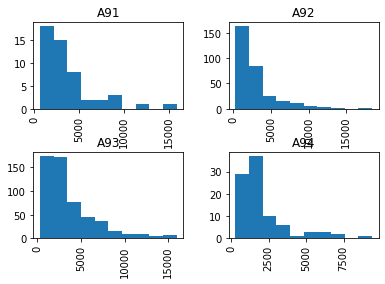

In [29]:
#A91 -> Divorced men
#A92 -> Women (married or divorced)
df_init.hist(column='Credit_amount', by='Personal_status_sex');
#plt.ylim(ymin=0,ymax=420)

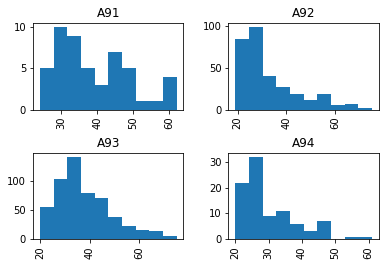

In [30]:
df_init.hist(column='Age', by='Personal_status_sex');

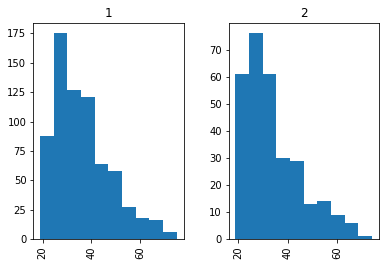

In [31]:
df_init.hist(column='Age', by='Target');

In [161]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Checking_account                1000 non-null   object
 1   Duration_months                 1000 non-null   int64 
 2   Credit_history                  1000 non-null   object
 3   Purpose                         1000 non-null   object
 4   Credit_amount                   1000 non-null   int64 
 5   Savings                         1000 non-null   object
 6   Present_employment_since        1000 non-null   object
 7   Installment_rate                1000 non-null   int64 
 8   Personal_status_sex             1000 non-null   object
 9   Other_debtors                   1000 non-null   object
 10  Present_residence_since         1000 non-null   int64 
 11  Property                        1000 non-null   object
 12  Age                             1000 non-null   i

In [169]:
# Getting the names of the columns that are not numerical
cat_list = df_init.select_dtypes(include=['object']).columns
cat_list

Index(['Checking_account', 'Credit_history', 'Purpose', 'Savings',
       'Present_employment_since', 'Personal_status_sex', 'Other_debtors',
       'Property', 'Other_installment_plans', 'Housing', 'Job', 'Telephone',
       'foreign_worker'],
      dtype='object')

In [170]:
# Transforming the columns into numerical ones, using LabelEncoder.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_list:
  # print(i)
  df[i] = le.fit_transform(df_init[i])

In [171]:
df.head()

,Checking_account,Duration_months,Credit_history,Purpose,Credit_amount,Savings,Present_employment_since,Installment_rate,Personal_status_sex,Other_debtors,...,Property,Age,Other_installment_plans,Housing,existing_credits,Job,People_provide_maintenance_for,Telephone,foreign_worker,Target
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,1
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,2
2,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,1
3,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,1
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,2


In [172]:
# Spliting the sample into train and test
from sklearn.model_selection import train_test_split
y=df.Target
X=df.drop(['Target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [173]:
X_train.shape

(750, 20)

In [174]:
y_test.shape

(250,)

In [206]:
from sklearn import tree
from sklearn.metrics import classification_report, matthews_corrcoef, confusion_matrix

import xgboost as xgb

import seaborn as sns

%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(10,7)})

In [215]:
# This is a function that returns some metrics for the classifier.
def show_results(y_test, y_preds):
  """ This function:
  - prints the MCC score
  - prints a classification report 
  - prints a heatmap colored confusion matrix 
  """
  print(f'mcc score: {matthews_corrcoef(y_test, preds)}')
  print(classification_report(y_test, preds))

  conf_mat = confusion_matrix(y_test, y_preds) 
  label_names = df['Target'].astype('category').cat.categories
  df_cm = pd.DataFrame(conf_mat, label_names, label_names) 

  sns.set(font_scale=1.4) 
  sns.heatmap(df_cm, annot=True, fmt='d', cmap="GnBu")

mcc score: 0.29686089575972197
              precision    recall  f1-score   support

           1       0.78      0.87      0.82       178
           2       0.55      0.40      0.46        72

    accuracy                           0.73       250
   macro avg       0.66      0.63      0.64       250
weighted avg       0.71      0.73      0.72       250



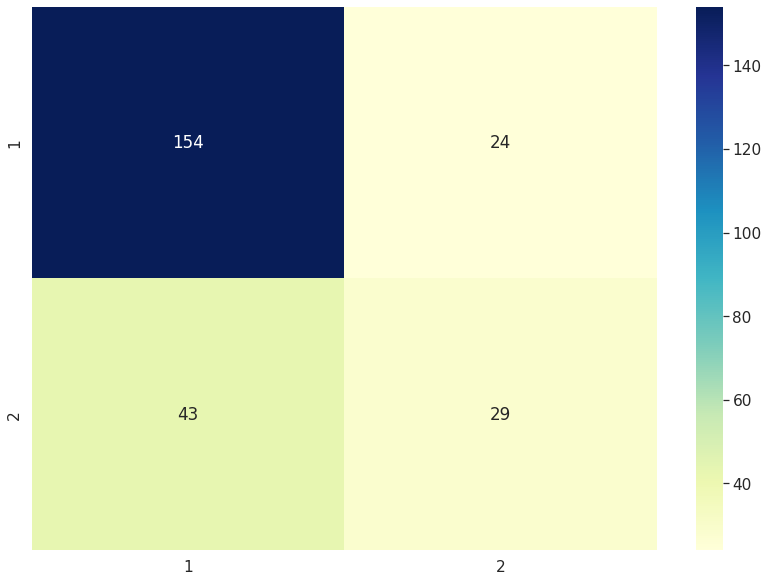

In [178]:
# Model - AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
abc = AdaBoostClassifier()

abc_clf = abc.fit(X_train, y_train)

preds = abc_clf.predict(X_test)

show_results(y_test, preds) 

In [177]:
# This is a function that calculates the PPV Fairness metric
# PPV = TP/(Predicted Positives)
# We can use group = 1 for women, since the categorical value for woman is 1 and group = 0 for men, 
# which are all the other categories.
def PPV(group):
    TP = 0
    Positives = 0
    y_test1 = y_test.reset_index(drop=True)
    X_test1 = X_test.reset_index(drop=True)
    
    for i in range(len(preds)): 
      if group==1:
        if y_test1[i]==preds[i]==X_test1['Personal_status_sex'].iloc[i]==1:
          TP += 1
        if preds[i]==X_test1['Personal_status_sex'].iloc[i]==1:
          Positives += 1
      
      if group==0:
        if y_test1[i]==preds[i]==1 and X_test1['Personal_status_sex'].iloc[i]!=1:
          TP += 1
        if preds[i]==1 and X_test1['Personal_status_sex'].iloc[i]!=1:
          Positives += 1

    PPV = TP/Positives  

    return(PPV)


In [179]:
#Fairness Metric PPV for women 
PPV(1)

0.7547169811320755

In [180]:
#Fairness Metric PPV for men 
PPV(0)

0.7916666666666666

In [181]:
# Model - XGBoost - First we need to prepare the data for XGBoost:
xgboost_train_data = xgb.DMatrix(X_train, label=y_train.astype('category').cat.codes)

mcc score: 0.42333033065612286
              precision    recall  f1-score   support

           1       0.81      0.90      0.85       178
           2       0.67      0.47      0.55        72

    accuracy                           0.78       250
   macro avg       0.74      0.69      0.70       250
weighted avg       0.77      0.78      0.77       250



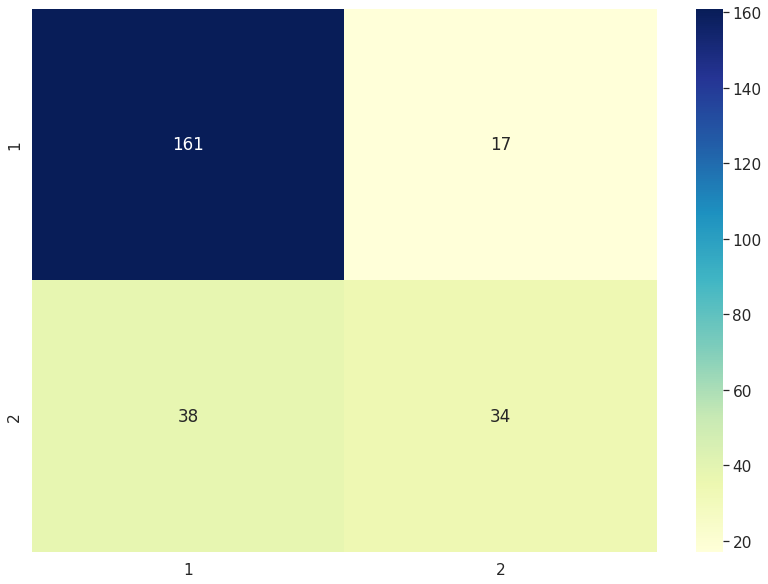

In [182]:
# XGBClassifier - XGB Classifier - a boosted ensemble of classifiers
reg = xgb.XGBClassifier()
xgb_clf = reg.fit(X_train, y_train)

preds = xgb_clf.predict(X_test)
show_results(y_test, preds) 

In [183]:
#Fairness Metric PPV for women 
PPV(1)

0.7868852459016393

In [184]:
#Fairness Metric PPV for men 
PPV(0)

0.8188405797101449

In [205]:
# Model - Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
reg = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
#reg = LogisticRegression(random_state=0)
clf = reg.fit(X_train, y_train)
preds = reg.predict(X_test)

mcc score: 0.4123339338668127
              precision    recall  f1-score   support

           1       0.81      0.88      0.85       178
           2       0.63      0.50      0.56        72

    accuracy                           0.77       250
   macro avg       0.72      0.69      0.70       250
weighted avg       0.76      0.77      0.76       250



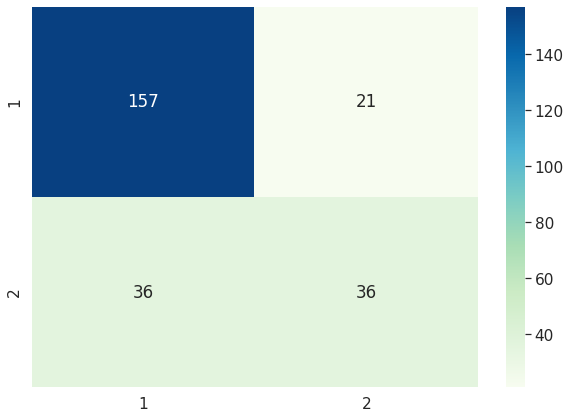

In [216]:
show_results(y_test, preds)

In [202]:
#Fairness Metric PPV for women 
PPV(1)

0.8181818181818182

In [203]:
#Fairness Metric PPV for men 
PPV(0)

0.8115942028985508

In [185]:
# Testing our PPV
y_test1 = [1,0,1,0,0]
X_test1 = [1,2,3,1,1]
preds1 = [1,0,1,1,1]


In [190]:
# group=1 for women and group = 0 for men
def PPV_test(group):
    TP = 0
    Positives = 0
  #  y_test1 = y_test.reset_index(drop=True)
  #  X_test1 = X_test.reset_index(drop=True)
    
    for i in range(len(preds1)): 
      if group==1:
        if y_test1[i]==preds1[i]==X_test1[i]==1:
          TP += 1
        if preds1[i]==X_test1[i]==1:
          Positives += 1
      
      if group==0:
        if y_test1[i]==preds1[i]==1 and X_test1[i]!=1:
          TP += 1
        if preds1[i]==1 and X_test1[i]!=1:
          Positives += 1

    PPV = TP/Positives  

    return(PPV)

In [191]:
PPV_test(1)

0.3333333333333333

In [192]:
PPV_test(0)

1.0

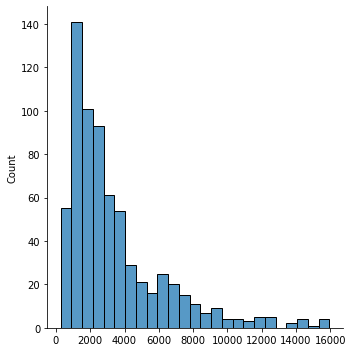

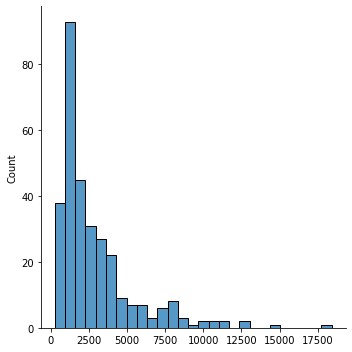

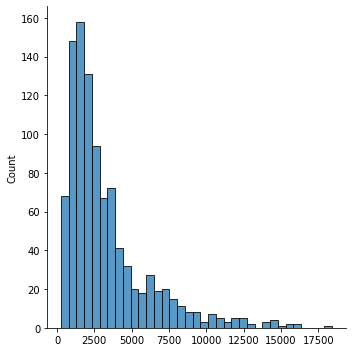

In [25]:
male_credit = df_init["Credit_amount"].loc[df_init["Personal_status_sex"].isin(['A94','A91','A93'])].values
female_credit = df_init["Credit_amount"].loc[df_init["Personal_status_sex"] == "A92"].values
total_credit = df_init['Credit_amount'].values

sns.displot(male_credit)
sns.displot(female_credit)
sns.displot(total_credit)
